<h1 align=center><font size = 7>Lab 04 : Linear Regression</font></h1>
<h1 align=center><font size = 5>Elham Khosravi</font></h1>
<h1 align=center><font size = 4>Hands-On Machine Learning, 2022 | DeadLine: 18th October, 13:00 </font></h1>



# Step0: Import Libraries

In [554]:
import pandas as pd

from sklearn.model_selection import train_test_split

import seaborn as sns

from sklearn.linear_model import LinearRegression

from sklearn import metrics

import numpy as np

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

# Step1: Read Data

In [555]:
df = pd.read_csv("Real estate.csv")

In [556]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


# Step2: X, y

In [557]:
df.rename(columns = {'Y house price of unit area':'price'}, inplace = True)

In [558]:
X = df.drop(['price', 'No', 'X1 transaction date', 'X3 distance to the nearest MRT station'], axis=1)
y = df['price']

In [559]:
X.head()

,X2 house age,X4 number of convenience stores,X5 latitude,X6 longitude
0,32.0,10,24.98298,121.54024
1,19.5,9,24.98034,121.53951
2,13.3,5,24.98746,121.54391
3,13.3,5,24.98746,121.54391
4,5.0,5,24.97937,121.54245


In [560]:
X.shape

(414, 4)

In [561]:
y.shape

(414,)

# Step3: Split Trainset and Testset (X_train, X_test, y_train, y_test)
<hr>
<b>from sklearn.model_selection import train_test_split</b>

In [562]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [563]:
X_train.shape

(331, 4)

In [564]:
X_test.shape

(83, 4)

# Step4: Data Visualization
<hr>
pairplot

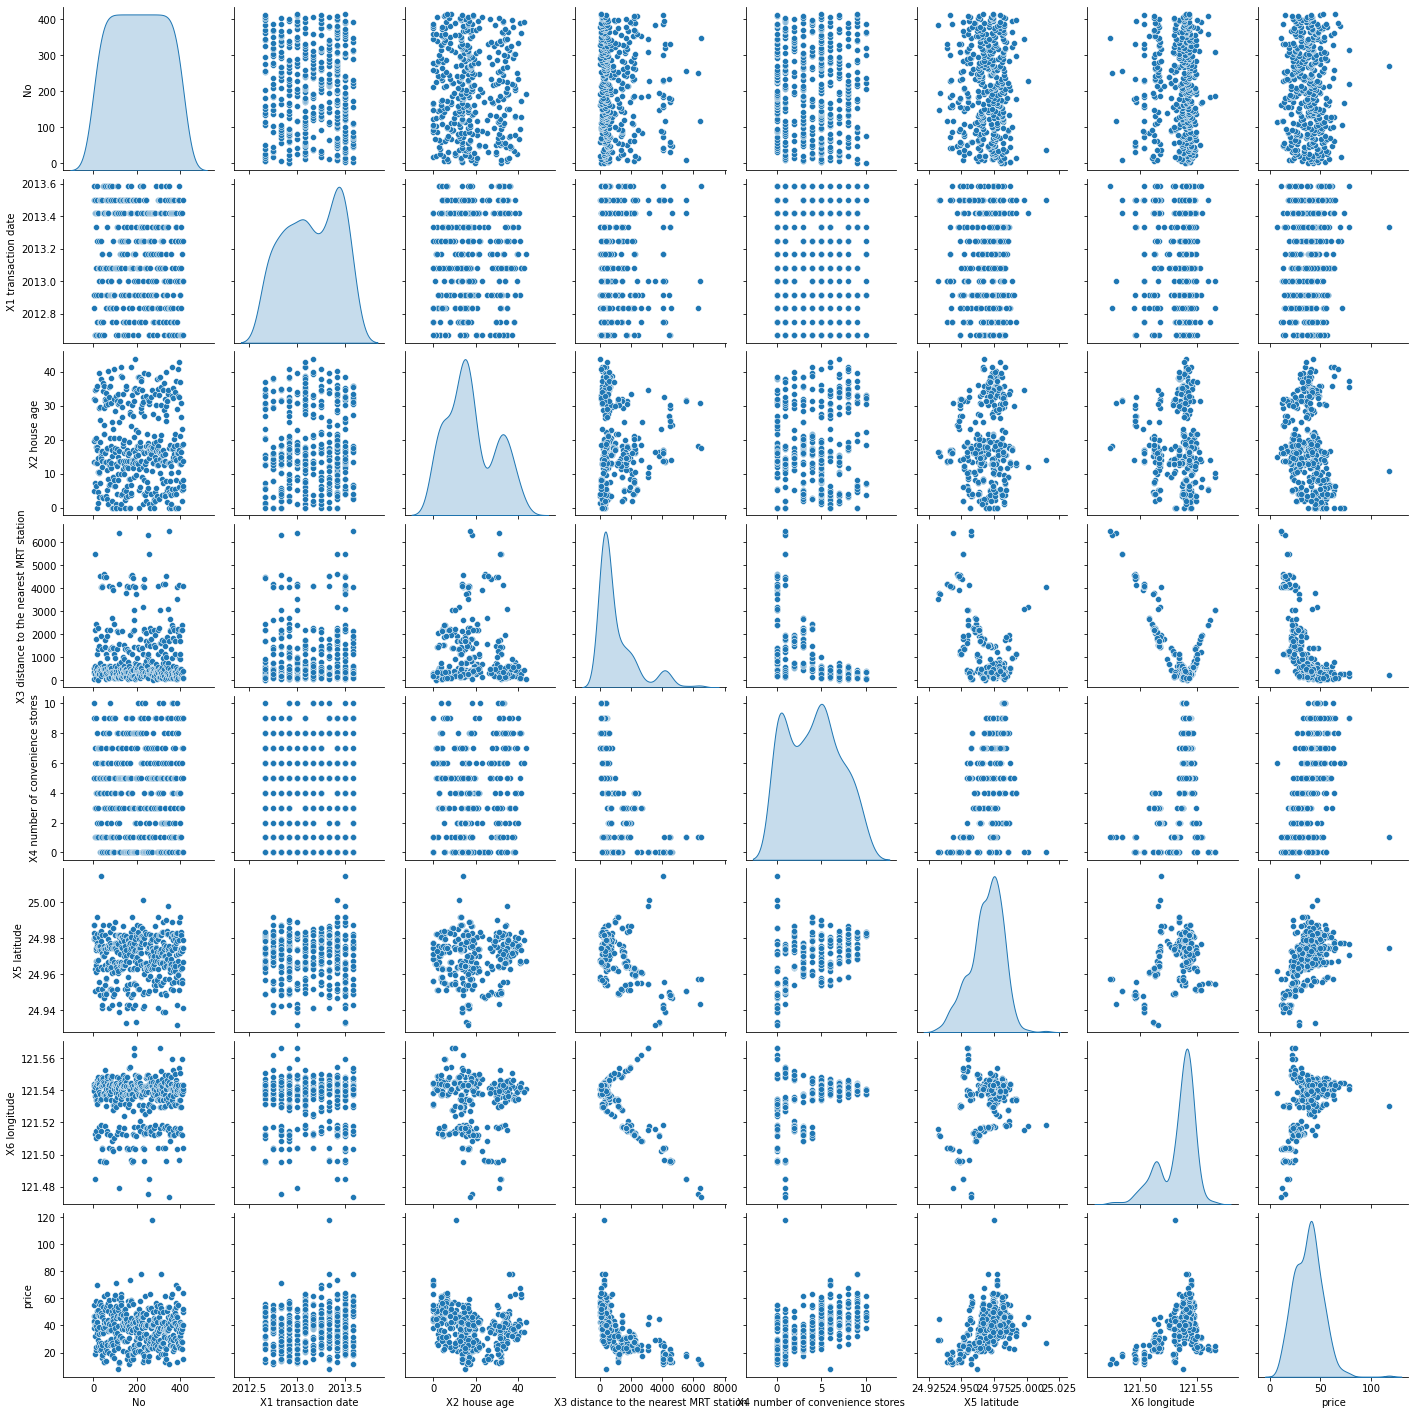

In [449]:
sns.pairplot(df, diag_kind = 'kde')

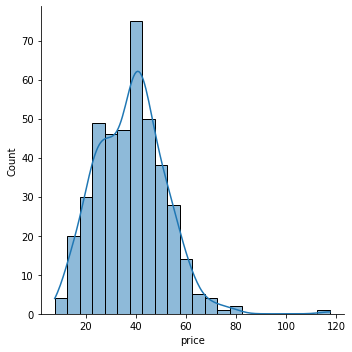

In [565]:
sns.displot(data=df, x='price', kde=True)

# Step5: Create the model
<b>linear regression</b>
<hr>
<b>from sklearn.linear_model import LinearRegression</b>

In [566]:
LR = LinearRegression()

# Step6: Training the model

In [567]:
LR.fit(X_train, y_train)

LinearRegression()

### Coefficients

In [568]:
LR.coef_

array([-2.92300973e-01,  1.69048906e+00,  3.47977918e+02,  2.17869233e+02])

### intercept

In [569]:
LR.intercept_

-35130.579657896735

# Step7: Predicting Test Data

In [570]:
y_pred = LR.predict(X_test)
y_pred

array([16.9813562 , 15.92066043, 35.60943817, 49.68379435, 34.73545007,
       38.15112148, 37.2901119 , 39.86518825, 46.85864198, 39.28330952,
       45.24354372, 32.46460033, 34.59975664, 41.38706688, 47.16359531,
       50.11540608, 34.79318191, 43.24957688, 52.47315452, 49.76482618,
       34.79652206, 53.75215757, 47.53093422, 35.2770385 , 29.62508525,
       49.07938227, 36.76260473, 50.01960903, 46.32526166, 38.35382956,
       51.97955297, 40.64741702, 44.13278834, 43.43963544, 47.57517772,
       12.03528952, 33.55133118, 37.40746164, 11.97682932, 57.23994169,
       31.18892296, 49.56392225, 19.75324917, 46.17436852, 45.08179463,
       52.826197  , 39.72310689, 35.29144457, 45.96351875, 33.9897065 ,
       47.77507296, 36.09030652, 40.47203643, 15.63263345, 37.32329134,
       49.80643906, 43.1843504 , 47.48192999, 45.13315941, 42.52589346,
       27.81073975, 39.56620695, 40.55972672, 42.97057988, 53.85824728,
       42.1534446 , 28.0294384 , 49.04084651, 29.72861518, 37.52

In [571]:
y_test

176    19.2
347    11.2
307    24.7
299    46.1
391    31.3
       ... 
65     44.3
48     13.4
18     42.3
15     50.5
143    40.1
Name: price, Length: 83, dtype: float64

# Step8: Evalutaing the Model
<hr>
<br>from sklearn import metrics</br>

### MAE

In [572]:
MAE = metrics.mean_absolute_error(y_test, y_pred)
MAE

5.759104090198699

### MSE

In [573]:
MSE = metrics.mean_squared_error(y_test, y_pred)
MSE

56.005432363583004

### RMSE

In [574]:
RMSE = np.sqrt(MSE)
RMSE

7.483677729805247

### Creat a DataFrame
<hr>
<b>MAE, MSE, RMSE</b>

In [575]:
ME = pd.DataFrame([MAE, MSE, RMSE] , index = ['MAE','MSE','RMSE'])
ME

,0
MAE,5.759104
MSE,56.005432
RMSE,7.483678


In [576]:
r1 = pd.Series({'MAE':MAE , 'MSE':MSE , 'RMSE':RMSE})
ME = pd.DataFrame([r1] , index=['Values'])
ME

,MAE,MSE,RMSE
Values,5.759104,56.005432,7.483678


# Extra Points

## Gradient Descent

# Step9: Scale Data

In [577]:
scaler = StandardScaler()

In [578]:
scaler.fit(X_train)

StandardScaler()

In [579]:
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

# Step10: Plot J(w,b), Iterations

In [580]:
def cost_function(x, y, W, b):
    m = x.shape[0]
    
    f_wb = np.dot(x, W) + b
    
    error = f_wb - y
    
    J = 1/(2*m) * np.sum(error ** 2)
    
    return J, error

In [581]:
J_hist = [0.1]
n_iter = 10000
J_h = np.zeros((n_iter+1,2))

def gradient(alpha, x, y, n_iter):
    
    m = x.shape[0]
    W = np.ones(X.shape[1])
    b=0
    
    for iter in range(0, n_iter):
        J, error = cost_function(x, y, W, b)
        
        J_hist.append(J)
        
        print("iter:",iter,"J:", J )
        
        J_h[iter, 1] = iter
        J_h[iter, 0] = J
        
        if(J_hist[iter+1] - J_hist[iter]==0):
            break
            
        dj_dw = 1/m * np.dot(x.T, error)
        
        dj_db = 1/m * np.sum(error)
        
        W = W- alpha * dj_dw
        
        b = b- alpha * dj_db
        
    return W,b

In [582]:
x, y = X_train_s, y_train

alpha=0.01

W, b = gradient(alpha, x, y, n_iter)



iter: 0 J: 806.3804209105039
iter: 1 J: 790.7843447787963
iter: 2 J: 775.5166346642233
iter: 3 J: 760.5700895808628
iter: 4 J: 745.9376764724993
iter: 5 J: 731.612525960993
iter: 6 J: 717.5879282128653
iter: 7 J: 703.8573289205027
iter: 8 J: 690.4143253945084
iter: 9 J: 677.2526627638317
iter: 10 J: 664.3662302804286
iter: 11 J: 651.7490577252984
iter: 12 J: 639.3953119128568
iter: 13 J: 627.2992932906931
iter: 14 J: 615.4554326318637
iter: 15 J: 603.8582878169581
iter: 16 J: 592.502540703268
iter: 17 J: 581.382994078475
iter: 18 J: 570.4945686963529
iter: 19 J: 559.8323003920616
iter: 20 J: 549.3913372746908
iter: 21 J: 539.1669369947801
iter: 22 J: 529.1544640846184
iter: 23 J: 519.3493873691962
iter: 24 J: 509.74727744574756
iter: 25 J: 500.3438042298888
iter: 26 J: 491.1347345664188
iter: 27 J: 482.11592990291194
iter: 28 J: 473.28334402428965
iter: 29 J: 464.6330208466136
iter: 30 J: 456.1610922684024
iter: 31 J: 447.8637760778222
iter: 32 J: 439.7373739141549
iter: 33 J: 431.7782

iter: 495 J: 46.97172079325411
iter: 496 J: 46.970990316381375
iter: 497 J: 46.97027404527183
iter: 498 J: 46.969571700897646
iter: 499 J: 46.96888300974326
iter: 500 J: 46.96820770369605
iter: 501 J: 46.967545519939335
iter: 502 J: 46.9668962008473
iter: 503 J: 46.96625949388228
iter: 504 J: 46.96563515149376
iter: 505 J: 46.96502293101967
iter: 506 J: 46.96442259458947
iter: 507 J: 46.9638339090292
iter: 508 J: 46.96325664576844
iter: 509 J: 46.96269058074907
iter: 510 J: 46.962135494335904
iter: 511 J: 46.96159117122907
iter: 512 J: 46.96105740037807
iter: 513 J: 46.96053397489765
iter: 514 J: 46.96002069198528
iter: 515 J: 46.95951735284027
iter: 516 J: 46.95902376258451
iter: 517 J: 46.95853973018479
iter: 518 J: 46.95806506837661
iter: 519 J: 46.95759959358961
iter: 520 J: 46.957143125874346
iter: 521 J: 46.956695488830626
iter: 522 J: 46.956256509537155
iter: 523 J: 46.95582601848281
iter: 524 J: 46.955403849498914
iter: 525 J: 46.95498983969321
iter: 526 J: 46.95458382938494
it

iter: 992 J: 46.93353249156261
iter: 993 J: 46.933532314427076
iter: 994 J: 46.933532139539466
iter: 995 J: 46.933531966869246
iter: 996 J: 46.933531796386326
iter: 997 J: 46.93353162806101
iter: 998 J: 46.933531461864135
iter: 999 J: 46.93353129776686
iter: 1000 J: 46.93353113574086
iter: 1001 J: 46.93353097575813
iter: 1002 J: 46.933530817791166
iter: 1003 J: 46.93353066181282
iter: 1004 J: 46.93353050779633
iter: 1005 J: 46.93353035571535
iter: 1006 J: 46.93353020554389
iter: 1007 J: 46.93353005725639
iter: 1008 J: 46.93352991082759
iter: 1009 J: 46.93352976623265
iter: 1010 J: 46.933529623447065
iter: 1011 J: 46.9335294824467
iter: 1012 J: 46.93352934320774
iter: 1013 J: 46.93352920570675
iter: 1014 J: 46.93352906992061
iter: 1015 J: 46.93352893582653
iter: 1016 J: 46.93352880340207
iter: 1017 J: 46.933528672625094
iter: 1018 J: 46.933528543473756
iter: 1019 J: 46.9335284159266
iter: 1020 J: 46.9335282899624
iter: 1021 J: 46.93352816556026
iter: 1022 J: 46.933528042699606
iter: 102

iter: 1457 J: 46.93351788175222
iter: 1458 J: 46.9335178809381
iter: 1459 J: 46.93351788013301
iter: 1460 J: 46.933517879336854
iter: 1461 J: 46.933517878549544
iter: 1462 J: 46.93351787777098
iter: 1463 J: 46.93351787700106
iter: 1464 J: 46.93351787623968
iter: 1465 J: 46.93351787548676
iter: 1466 J: 46.9335178747422
iter: 1467 J: 46.9335178740059
iter: 1468 J: 46.93351787327778
iter: 1469 J: 46.93351787255775
iter: 1470 J: 46.9335178718457
iter: 1471 J: 46.93351787114156
iter: 1472 J: 46.93351787044525
iter: 1473 J: 46.93351786975665
iter: 1474 J: 46.9335178690757
iter: 1475 J: 46.93351786840232
iter: 1476 J: 46.93351786773639
iter: 1477 J: 46.93351786707786
iter: 1478 J: 46.933517866426655
iter: 1479 J: 46.933517865782655
iter: 1480 J: 46.93351786514581
iter: 1481 J: 46.93351786451605
iter: 1482 J: 46.93351786389326
iter: 1483 J: 46.93351786327739
iter: 1484 J: 46.93351786266834
iter: 1485 J: 46.93351786206606
iter: 1486 J: 46.933517861470456
iter: 1487 J: 46.93351786088147
iter: 14

iter: 1725 J: 46.93351781202748
iter: 1726 J: 46.93351781198633
iter: 1727 J: 46.93351781194562
iter: 1728 J: 46.93351781190536
iter: 1729 J: 46.93351781186554
iter: 1730 J: 46.93351781182618
iter: 1731 J: 46.93351781178724
iter: 1732 J: 46.93351781174874
iter: 1733 J: 46.933517811710644
iter: 1734 J: 46.93351781167299
iter: 1735 J: 46.933517811635745
iter: 1736 J: 46.93351781159892
iter: 1737 J: 46.93351781156249
iter: 1738 J: 46.933517811526464
iter: 1739 J: 46.933517811490844
iter: 1740 J: 46.933517811455616
iter: 1741 J: 46.93351781142077
iter: 1742 J: 46.93351781138632
iter: 1743 J: 46.933517811352246
iter: 1744 J: 46.93351781131855
iter: 1745 J: 46.93351781128521
iter: 1746 J: 46.933517811252266
iter: 1747 J: 46.93351781121967
iter: 1748 J: 46.93351781118744
iter: 1749 J: 46.93351781115555
iter: 1750 J: 46.933517811124034
iter: 1751 J: 46.93351781109286
iter: 1752 J: 46.933517811062025
iter: 1753 J: 46.933517811031535
iter: 1754 J: 46.93351781100138
iter: 1755 J: 46.9335178109715

iter: 2208 J: 46.93351780831862
iter: 2209 J: 46.93351780831842
iter: 2210 J: 46.93351780831822
iter: 2211 J: 46.93351780831804
iter: 2212 J: 46.933517808317845
iter: 2213 J: 46.93351780831767
iter: 2214 J: 46.93351780831749
iter: 2215 J: 46.93351780831729
iter: 2216 J: 46.93351780831712
iter: 2217 J: 46.93351780831694
iter: 2218 J: 46.933517808316765
iter: 2219 J: 46.933517808316594
iter: 2220 J: 46.93351780831642
iter: 2221 J: 46.93351780831625
iter: 2222 J: 46.93351780831609
iter: 2223 J: 46.93351780831592
iter: 2224 J: 46.933517808315756
iter: 2225 J: 46.93351780831559
iter: 2226 J: 46.93351780831543
iter: 2227 J: 46.93351780831528
iter: 2228 J: 46.933517808315116
iter: 2229 J: 46.93351780831495
iter: 2230 J: 46.933517808314804
iter: 2231 J: 46.933517808314654
iter: 2232 J: 46.933517808314505
iter: 2233 J: 46.93351780831435
iter: 2234 J: 46.933517808314214
iter: 2235 J: 46.93351780831407
iter: 2236 J: 46.93351780831392
iter: 2237 J: 46.93351780831378
iter: 2238 J: 46.93351780831364

In [583]:
X_test_s.shape

(83, 4)

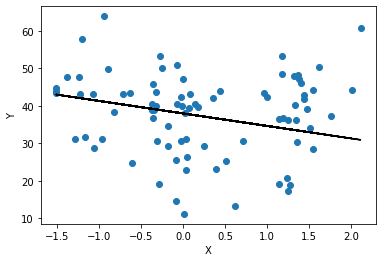

In [584]:
for i in range(x.shape[1]):
    y_prediction = X_test_s[:, [0]] * W[0] + b 
plt.plot(X_test_s[:, [0]], y_test, 'o')
plt.plot(X_test_s[:, [0]], y_prediction, 'k-')
plt.xlabel("X")
plt.ylabel("Y")

plt.show()

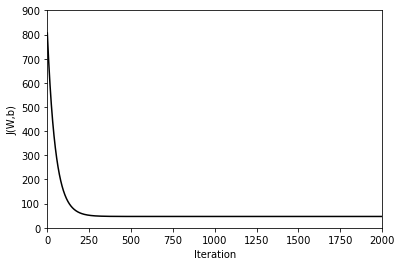

In [585]:
plt.plot(J_h[:2400,[1]], J_h[:2400,[0]], color="black")
plt.xlabel("Iteration")
plt.ylabel("J(W,b)")

plt.xlim([0, 2000])
plt.ylim([0, 900])

plt.show()

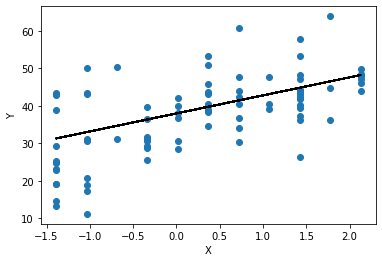

In [586]:
for i in range(x.shape[1]):
    y_prediction = X_test_s[:, [1]] * W[1] + b 
plt.plot(X_test_s[:, [1]], y_test, 'o')
plt.plot(X_test_s[:, [1]], y_prediction, 'k-')
plt.xlabel("X")
plt.ylabel("Y")

plt.show()

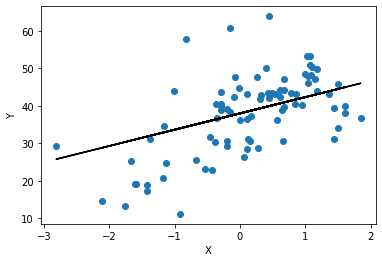

In [587]:
for i in range(x.shape[1]):
    y_prediction = X_test_s[:, [2]] * W[2] + b 
plt.plot(X_test_s[:, [2]], y_test, 'o')
plt.plot(X_test_s[:, [2]], y_prediction, 'k-')
plt.xlabel("X")
plt.ylabel("Y")

plt.show()

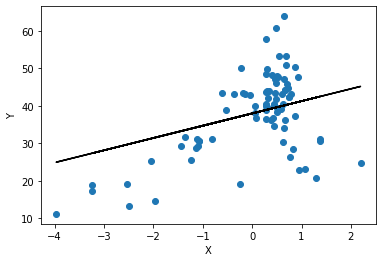

In [588]:
for i in range(x.shape[1]):
    y_prediction = X_test_s[:, [3]] * W[3] + b 
plt.plot(X_test_s[:, [3]], y_test, 'o')
plt.plot(X_test_s[:, [3]], y_prediction, 'k-')
plt.xlabel("X")
plt.ylabel("Y")

plt.show()

<div class="alert alert-success" role="alert">
  <h1 class="alert-heading">Well done!</h1>
  <p>Best Wishes!, Filoger</p>
</div>